# EPA1361 - Model-Based Decision Making

## Multi-model analysis

This exercise uses a simple version of the [Lotka-Volterra predator-prey equations](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) to show how the EMA Workbench can be used for a
multi-model analysis, in addition to typical parametric/structural uncertainties. This will let you test the connectors provided in the Workbench for Excel, NetLogo, and Vensim / PySD; we'll also use the models for the sensitivity analysis exercise in week 3.

* Using the three model files provided and the Python function below, define model objects for each implementation (Excel, NetLogo, Vensim/PySD, and Python), and test them using a single ensemble. Use 50 experiments sampled from the parameters below (so that each experiment will be executed for the 4 models, for a total of 200), and retrieve outputs for the _TIME_, _predators_, and _prey_ variables.
    * excel and vensim are only supported on windows
    * vensim requires 32 bit python, and a 7.1!! version of vensim DSS
    * Netlogo supoprt depends on [jpype](http://jpype.readthedocs.io/en/latest/install.html) and if you don't have NetLogo installed, please get it from [NetLogo 6.0](https://ccl.northwestern.edu/netlogo/download.shtml) 
    * for pysd, see [its documentation](http://pysd.readthedocs.io/en/master/installation.html)
    * If possible try to work with all model versions, but even 2 or 3 (pure python and something else should be sufficient).
    

|Parameter	|Range or value	        |
|-----------|--------------:|
|prey_birth_rate    	|0.015 – 0.035	|
|predation_rate|0.0005 – 0.003 	|
|predator_efficiency     	|0.001 – 0.004	    |
|predator_loss_rate	    |0.04 – 0.08	    |
|Final time	    |365	    |
|dt	    |0.25	    |

* Note that your EMA Workbench installation includes example scripts for the different connectors. The different model objects follow a similar syntax but will need to be slightly adjusted depending on the software (e.g. to specify the NetLogo run length or the sheet name in Excel). 

* These model objects can be used with a replication functionality (for instance to test the effect of stochastic uncertainty in a NetLogo model), which repeats a given experiment over multiple replications. You can use a single replication in this exercise as the models are not stochastic. By default, each outcome array will then have a shape of (# experiments, # replications, # time steps). Try adapting the outcome arrays so that they can be used with the _lines_ plotting function of the Workbench, and plot the results grouped by model.

* To check the graphical results, find the maximum absolute error of the time series you obtained for the _prey_ variable in the Excel, NetLogo, and Vensim/PySD models, relative to the Python function. 

In [1]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt
import seaborn as sns
import pysd

from PredPrey import *

In [2]:
from ema_workbench import Model, RealParameter, TimeSeriesOutcome, perform_experiments, ema_logging, MultiprocessingEvaluator

from ema_workbench.connectors.netlogo import NetLogoModel #jpype error solved
from ema_workbench.connectors.excel import ExcelModel #win32com error solved
from ema_workbench.connectors.pysd_connector import PysdModel

from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS

from ema_workbench.analysis.plotting import lines
from ema_workbench.analysis.plotting_util import KDE

ema_logging.log_to_stderr(ema_logging.INFO)

C:\Anaconda3\envs\py36_32\lib\site-packages\ema_workbench\em_framework\optimization.py:29: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


<Logger EMA (DEBUG)>

## 1. Pysd Model

In [3]:
model = PysdModel(name="mdl", mdl_file="./model/PredPrey.mdl")

In [4]:
# import re

# args = "prey_birth_rate=0.025, predation_rate=0.0015, predator_efficiency=0.002, predator_loss_rate=0.06, initial_prey=50, initial_predators=20, dt=0.25, final_time=365, reps=1".split(", ")
# func = lambda string: re.sub(r"=.*","",string)
# vfunc = np.vectorize(func)
# args = vfunc(args)

In [5]:
model.uncertainties = [
    RealParameter('prey_birth_rate',0.015,0.035),
    RealParameter('predation_rate',0.0005,0.003),
    RealParameter('predator_efficiency',0.001,0.004),
    RealParameter('predator_loss_rate',0.04,0.08),
]

model.outcomes = [
    TimeSeriesOutcome("TIME"),
    TimeSeriesOutcome("predators",),
    TimeSeriesOutcome("prey"),
]

n_scenarios = 100
result = perform_experiments(models = model, scenarios = n_scenarios)

[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 70 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] experiments finished


In [14]:
type(result)

tuple

In [13]:
result

(array([(0.00200991, 0.00111245, 0.07534495, 0.02743208, 0, 'None', 'mdl'),
        (0.00216302, 0.003287  , 0.05429898, 0.02716336, 1, 'None', 'mdl'),
        (0.00296121, 0.00240039, 0.07990457, 0.0293188 , 2, 'None', 'mdl'),
        (0.00124206, 0.00269757, 0.07919084, 0.02694792, 3, 'None', 'mdl'),
        (0.00190307, 0.00158069, 0.06763375, 0.01819512, 4, 'None', 'mdl'),
        (0.00152729, 0.00168992, 0.07836882, 0.01565013, 5, 'None', 'mdl'),
        (0.00082495, 0.00117117, 0.04982791, 0.03305916, 6, 'None', 'mdl'),
        (0.00113272, 0.0035946 , 0.06083561, 0.03451751, 7, 'None', 'mdl'),
        (0.00147774, 0.00204364, 0.07771254, 0.03189204, 8, 'None', 'mdl'),
        (0.00245814, 0.00290569, 0.06666948, 0.01982266, 9, 'None', 'mdl'),
        (0.00240185, 0.00229574, 0.05923648, 0.0150677 , 10, 'None', 'mdl'),
        (0.0028649 , 0.00210911, 0.07375254, 0.03399079, 11, 'None', 'mdl'),
        (0.00255451, 0.00176062, 0.04143718, 0.02979221, 12, 'None', 'mdl'),
        (

In [9]:
result[0]

array([(0.00200991, 0.00111245, 0.07534495, 0.02743208, 0, 'None', 'mdl'),
       (0.00216302, 0.003287  , 0.05429898, 0.02716336, 1, 'None', 'mdl'),
       (0.00296121, 0.00240039, 0.07990457, 0.0293188 , 2, 'None', 'mdl'),
       (0.00124206, 0.00269757, 0.07919084, 0.02694792, 3, 'None', 'mdl'),
       (0.00190307, 0.00158069, 0.06763375, 0.01819512, 4, 'None', 'mdl'),
       (0.00152729, 0.00168992, 0.07836882, 0.01565013, 5, 'None', 'mdl'),
       (0.00082495, 0.00117117, 0.04982791, 0.03305916, 6, 'None', 'mdl'),
       (0.00113272, 0.0035946 , 0.06083561, 0.03451751, 7, 'None', 'mdl'),
       (0.00147774, 0.00204364, 0.07771254, 0.03189204, 8, 'None', 'mdl'),
       (0.00245814, 0.00290569, 0.06666948, 0.01982266, 9, 'None', 'mdl'),
       (0.00240185, 0.00229574, 0.05923648, 0.0150677 , 10, 'None', 'mdl'),
       (0.0028649 , 0.00210911, 0.07375254, 0.03399079, 11, 'None', 'mdl'),
       (0.00255451, 0.00176062, 0.04143718, 0.02979221, 12, 'None', 'mdl'),
       (0.00151997, 0.

In [15]:
result[1]

{'TIME': array([[0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.6450e+02, 3.6475e+02,
         3.6500e+02],
        [0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.6450e+02, 3.6475e+02,
         3.6500e+02],
        [0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.6450e+02, 3.6475e+02,
         3.6500e+02],
        ...,
        [0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.6450e+02, 3.6475e+02,
         3.6500e+02],
        [0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.6450e+02, 3.6475e+02,
         3.6500e+02],
        [0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.6450e+02, 3.6475e+02,
         3.6500e+02]]),
 'predators': array([[20.        , 19.90138747, 19.80237794, ...,  8.24484063,
          8.29718777,  8.35043465],
        [20.        , 20.55025479, 21.11225068, ...,  0.5374259 ,
          0.53823429,  0.53909666],
        [20.        , 20.2005758 , 20.3986316 , ...,  2.29597432,
          2.29147016,  2.28720724],
        ...,
        [20.        , 20.70018829, 21.42205046, ...,  0.44413269,
   

In [16]:
result[1]["predators"]

array([[20.        , 19.90138747, 19.80237794, ...,  8.24484063,
         8.29718777,  8.35043465],
       [20.        , 20.55025479, 21.11225068, ...,  0.5374259 ,
         0.53823429,  0.53909666],
       [20.        , 20.2005758 , 20.3986316 , ...,  2.29597432,
         2.29147016,  2.28720724],
       ...,
       [20.        , 20.70018829, 21.42205046, ...,  0.44413269,
         0.44532988,  0.44658593],
       [20.        , 20.55959971, 21.13410239, ..., 58.07933518,
        57.44418342, 56.80957992],
       [20.        , 20.13826317, 20.27755242, ..., 10.98724336,
        10.96690842, 10.94724734]])

In [11]:
result[1]["predators"]

array([[20.        , 19.90138747, 19.80237794, ...,  8.24484063,
         8.29718777,  8.35043465],
       [20.        , 20.55025479, 21.11225068, ...,  0.5374259 ,
         0.53823429,  0.53909666],
       [20.        , 20.2005758 , 20.3986316 , ...,  2.29597432,
         2.29147016,  2.28720724],
       ...,
       [20.        , 20.70018829, 21.42205046, ...,  0.44413269,
         0.44532988,  0.44658593],
       [20.        , 20.55959971, 21.13410239, ..., 58.07933518,
        57.44418342, 56.80957992],
       [20.        , 20.13826317, 20.27755242, ..., 10.98724336,
        10.96690842, 10.94724734]])

(<Figure size 432x288 with 2 Axes>,
 {'predators': <matplotlib.axes._subplots.AxesSubplot at 0x2fd7190>,
  'prey': <matplotlib.axes._subplots.AxesSubplot at 0x2df8610>})

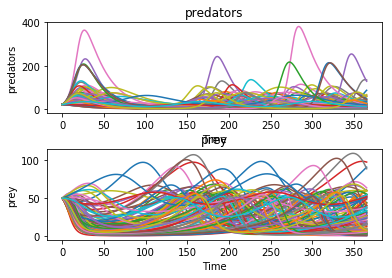

In [12]:
lines(result)

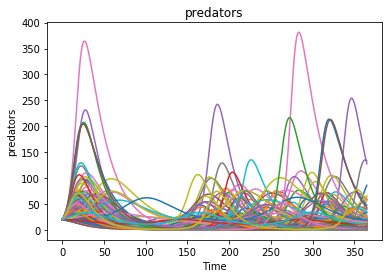

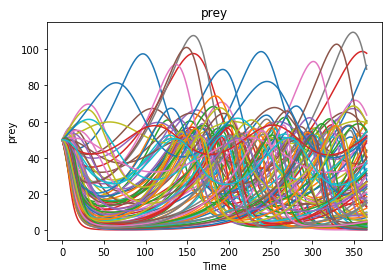

In [6]:
outcomes = list(result[1].keys())
outcomes.pop(0)
for outcome in outcomes:
    lines(result, outcomes_to_show=[outcome])

In [7]:
def result_df(result):
    df = pd.DataFrame()
    for i, key in enumerate(result[1].keys()):
        df[key] = result[1][key].flatten()
    n_exp = result[1][key].shape[0]
    t_steps = result[1][key].shape[1]

    df["experiment"] = np.repeat(range(n_exp), t_steps)
    return df
df = result_df(result)

## 2. NetLogo Model